# K-Nearest Neighbors
***
**Name**: Ilamvazhuthy Subbiah
***

This assignment is due on Canvas by **5pm on Wednesday September 19th**. Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. Your solutions to analysis questions should be done in Markdown directly below the associated question.  Remember that you are encouraged to discuss the problems with your classmates and instructors, but **you must write all code and solutions on your own**, and list any people or sources consulted.


## Overview 
***


In this homework you'll implement prototype based k-nn and perceptron (with offset = 0) training algorithms using convergence method covered in the class.

Most of this assignment will be done by calling libraries that are already implemented for you. You can use python loops to accomplish most of the implementation, but we would strongly encourage you to use vectorized operations using `numpy` package.

Here are the rules: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function or class API **do not** change it.
- Do not change the location of the data or data directory.  Use only relative paths to access the data. 

### Linear Algebra - 10 points
***
Given matrix:

$$
\begin{equation*}
\mathbf{A} = \begin{bmatrix}2 & -1 & 0\\-1 & 2 & -1\\ 0 & -1 & 2\end{bmatrix}
\end{equation*}
$$

Answer the following questions:

**1.** Are the vectors $\begin{equation*} \mathbf{x} = \begin{bmatrix}2\\-1\\0\end{bmatrix}, \mathbf{y} = \begin{bmatrix}-1 \\ 2 \\ -1\end{bmatrix}, \mathbf{z} = \begin{bmatrix}0 \\ -1 \\2\end{bmatrix} \end{equation*}$ linearly independent? Justify your answer


>__Answer:__ Yes, the vectors are linearly independent. For the vectors to be linearly dependent, we have to show that there exists a non-trivial solution to the equation

>$$c_1\mathbf{x} + c_2\mathbf{y} + c_3\mathbf{z} = 0 $$

>Writing the matrix in augmented form and doing row operations, we get

>$$\begin{bmatrix}2 & -1 & 0 & 0\\-1 & 2 & -1 & 0\\ 0 & -1 & 2 & 0\end{bmatrix} \sim \begin{bmatrix}2 & -1 & 0 & 0\\0 & 3 & -2 & 0\\ 0 & 0 & 1 & 0\end{bmatrix}$$

>The only set of values for $c_1, c_2, c_3$ that satisfy the equation are $c_1 = 0$, $c_2 = 0$, $c_3 = 0$. Hence the vectors are linearly independent.

**2.** Find the eigenvalues and the corresponding eigenvectors of $\mathbf{A}$

>__Answer:__ A scalar $\lambda$ is an eigenvalue of $\mathbf{A}$ if and only if it satisfies the characteristic equation

>$$\det(\mathbf{A}-\lambda \mathbf{I}) = 0$$
where $\mathbf{I}$ is the identity matrix.
>$$\mathbf{A}-\lambda \mathbf{I} = \begin{bmatrix}2- \lambda & -1 & 0\\-1 & 2-\lambda & -1\\ 0 & -1 & 2-\lambda\end{bmatrix}$$

>$$\implies \det(\mathbf{A}-\lambda \mathbf{I}) = (2-\lambda)((2-\lambda)^2-1) - (2-\lambda) = 0$$

>$$\implies (2-\lambda)(\lambda^2 -4\lambda +2) = 0$$

>$$\implies \lambda = 2,\, 2 + \sqrt{2},\,2 -\sqrt{2}$$

>To find the eigenvectors, we need to find the solution to the equation

>$$(\mathbf{A}-\lambda \mathbf{I})\mathbf{x} = 0$$

>Writing the augmented matrix for $\lambda = 2$ and doing row operations, we get

>$$\begin{bmatrix}2-2 & -1 & 0 & 0\\-1 & 2-2 & -1 & 0\\ 0 & -1 & 2-2 & 0\end{bmatrix} \sim \begin{bmatrix}1 & 0 & 1 & 0\\0 & 1 & 0 & 0\\ 0 & 0 & 0 & 0\end{bmatrix}$$

>The general solution is of the form $\begin{equation*}  \begin{bmatrix}-1\\0\\1\end{bmatrix}x_3\end{equation*}$. Any vector of this form with $x_3 \neq 0$ is an eigenvector corresponding to $\lambda = 2$. 

>Writing the augmented matrix for $\lambda = 2 + \sqrt{2}$ and doing row operations, we get

>$$\begin{bmatrix}2-2-\sqrt{2} & -1 & 0 & 0\\-1 & 2-2-\sqrt{2} & -1 & 0\\ 0 & -1 & 2-2-\sqrt{2} & 0\end{bmatrix} \sim \begin{bmatrix}1 & 0 & -1 & 0\\0 & 1 & \sqrt{2} & 0\\ 0 & 0 & 0 & 0\end{bmatrix}$$

>The general solution is of the form $\begin{equation*}  \begin{bmatrix}1\\-\sqrt{2}\\1\end{bmatrix}x_3\end{equation*}$. Any vector of this form with $x_3 \neq 0$ is an eigenvector corresponding to $\lambda = 2 + \sqrt{2}$.

>Writing the augmented matrix for $\lambda = 2 -\sqrt{2}$ and doing row operations, we get

>$$\begin{bmatrix}2-2+\sqrt{2} & -1 & 0 & 0\\-1 & 2-2+\sqrt{2} & -1 & 0\\ 0 & -1 & 2-2+\sqrt{2} & 0\end{bmatrix} \sim \begin{bmatrix}1 & 0 & -1 & 0\\0 & 1 & -\sqrt{2} & 0\\ 0 & 0 & 0 & 0\end{bmatrix}$$

>The general solution is of the form $\begin{equation*}  \begin{bmatrix}1\\ \sqrt{2}\\1\end{bmatrix}x_3\end{equation*}$. Any vector of this form with $x_3 \neq 0$ is an eigenvector corresponding to $\lambda = 2 - \sqrt{2}$.

**3.** Let $M$ be any matrix with real entries. $M$ is *positive semidefinite* if, for any vector $x$ with real components, the dot product of $Mx$ and $x$ is nonnegative, $\langle Mx, x \rangle \geq 0$

Let $B = \begin{bmatrix}1 & 2\\-2 & 1\end{bmatrix}$. Show that $B$ is positive semidefinite.(i.e., show that $\langle Bx, x \rangle \geq 0$)

>__Answer:__ Let $x$ be represented as 

>$$ x = \begin{bmatrix}x_1\\ x_2 \end{bmatrix}$$

>$$ \implies Bx = \begin{bmatrix}x_1 + 2x_2\\ -2x_1+ x_2 \end{bmatrix}$$

>$$\implies \langle Bx, x \rangle = x_1^2 + 2x_1x_2 - 2x_1x_2 + x_2^2$$

>$$\implies \langle Bx, x \rangle = x_1^2 + x_2^2$$

>since $x_1$ and $x_2$ are real valued, $\langle Bx, x \rangle \geq 0$. Hence, $B$ is positive semidefinite.

**4.** A *symmetric* matrix $H$ is positive semidefinite if and only if the eigenvalues of $H$ are all non-negative. Is matrix $A$ positive semidefinite? Why?

>__Answer:__ Yes, matrix $A$ is positive semidefinite since it is symmetric and its eigenvalues are all non-negative.

### Prototype Based K-NN - 10 points
***

In this problem you'll implement a prototype based K-Nearest Neighbor framework to take an image of a handwritten digit and predict which digit it corresponds to.

<br>

![Samples of Handwritten Digits](wide_mnist.png "MNIST Digits")


<br>

In [7]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

The class below will load and store the MNIST data.  Load the data and then report: 
- The number of examples in the training set 
- The number of examples in the test set 
- The number of pixels in each image. 
- Plot the number of data points per class
   

In [8]:
class Numbers:
    """
    Class to store MNIST data
    """
    def __init__(self, location):

        import pickle, gzip

        # load data from file 
        f = gzip.open(location, 'rb')
        train_set, valid_set, test_set = pickle.load(f)
        f.close()

        # store for use later  
        self.train_x, self.train_y = train_set
        self.test_x, self.test_y = valid_set

In [9]:
DATA_PATH = "data/mnist.pklz"
data = Numbers(DATA_PATH)

Number of examples in the training set is 50000
Number of examples in the test set is 10000
Number of pixels in each image is 784


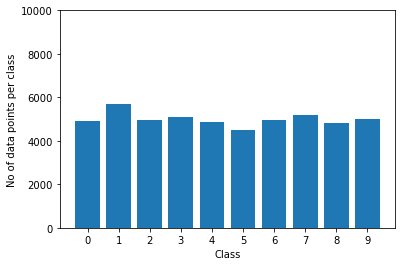

In [10]:
# Number of examples in the training set
print('Number of examples in the training set is', len(data.train_x))

# Number of examples in the test set
print('Number of examples in the test set is', len(data.test_x))

#Number of pixels in the image
print('Number of pixels in each image is', len(data.train_x[0]))

# Plotting the number of data points per class
no_of_data_points = {}
for item in data.train_y:
    no_of_data_points[item] = no_of_data_points.get(item,0) + 1

x, y = zip(*sorted(no_of_data_points.items()))
#plt.plot(x, y)
plt.bar(x, y)
plt.xlabel("Class")
plt.ylabel("No of data points per class")
plt.ylim((0,10000))
plt.xticks(np.arange(0, 10, 1.0))
plt.show()

The class below will perform K-Nearest Neighbor classification on our handwritten digit data. Your tasks are as follows:

1. Modify `select_prototypes` method to select `p` random prototypes from training data which will be used for finding `k` nearest neighbors instead of all the training data points.
1. Modify the `label_counts` function to return a dictionary of frequencies corresponding to each label in the training set.
1. Modify the `majority` function so that it returns the _label_ that appears most frequently in the $K$-nearest neighbors of the query point.  In the case that the maximum frequency occurs for two or more labels, return the one that appears most frequently in the entire training set. In the case that there is still a tie, break the tie in any way that you choose.
1. Modify the `confusion_matrix` function to classify examples and record the results in a confusion matrix. You should construct the confusion matrix on your own. Don't call any additional functions from sklearn to do it for you.
1. Modify the `classify` function so that it finds the indices of the $K$ closest training examples to the query point and then calls the `majority` function to return the predicted label. Almost all of the heavy lifting here will be done by the `BallTree` object from sklearn.neighbors, so you'll want to start out by reading the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.BallTree.html#sklearn.neighbors.BallTree.query)

The class Knearest also implements an accuracy function which you will use in subsequent problems. You should not have to modify this function.

In [11]:
class Knearest:
    """
    kNN classifier
    """

    def __init__(self, X, y, k=5, p=10):
        """
        Creates a kNN instance

        :param x: Training data input
        :param y: Training data output
        :param k: The number of nearest points to consider in classification
        :param p: The number of prototypes to choose
        """
        
        from sklearn.neighbors import BallTree
        
        self._p = p
        self._x, self._y = self.select_prototypes(X, y)
        self._k = k
        self._counts = self.label_counts(y)
        self._kdtree = BallTree(self._x)
            
    def label_counts(self, y):
        """
        Given the training prototypes, return a dictionary d where d[y] is  
        the number of times that label y appears in the training prototypes.
        
        :param y: Training labels input
        """   
        d = {}
        for i in range(0, len(y)):
            d[y[i]] = d.get(y[i], 0) + 1

        return d


    def majority(self, neighbor_indices):
        """
        Given the indices of training protypes, return the majority label. Break ties 
        by choosing the tied label that appears most often in the training prototypes. 

        :param neighbor_indices: The indices of the k nearest neighbors
        """
        assert len(neighbor_indices) == self._k, "Did not get k neighbor indices"
        
        count = {}
        for i in range(0, len(neighbor_indices)):
            count[self._y[neighbor_indices[i]]] = count.get(self._y[neighbor_indices[i]], 0) + 1
        
        # Get the Majority Labels
        max_count = max(count.values())
        max_labels = [key for key in count.keys() if count[key] == max_count] 
        max_label = max_labels[0]
        
        # Break ties if there is more than one majority label
        if len(max_labels) > 1:
            max_label = max_labels[0]
            for label in max_labels:
                if self._counts[label] > self._counts[max_label]:
                    max_label = label
                    
        return max_label
    

    def classify(self, example):
        """
        Given an example, return the predicted label.

        :param example: A representation of an example in the same
        format as a row of the training data
        """
        _, indices = self._kdtree.query(example.reshape(1,-1), self._k)
        neighbor_indices = indices.reshape(-1)
        
        return self.majority(neighbor_indices)        
        
    def select_prototypes(self, X, y):
        """
        Given the train data, select p random prototypes from data for classification
        calculation.
        
        :param x: Training data input
        :param y: Training data output
        """
        # Create a list of indices and randomly shuffle them.
        # Choose the first p indices
        random_list = [i for i in range(0, len(X))]
        random.shuffle(random_list)
        
        X_proto = np.array([X[random_list[i]] for i in range(0, self._p)])
        y_proto = np.array([y[random_list[i]] for i in range(0, self._p)])
        
        return X_proto, y_proto
            
    def confusion_matrix(self, test_x, test_y):
        """
        Given a matrix of test examples and labels, compute the confusion
        matrix for the current classifier.  Should return a 2-dimensional
        numpy array of ints, C, where C[ii,jj] is the number of times an 
        example with true label ii was labeled as jj.

        :param test_x: test data 
        :param test_y: true test labels 
        """
        
        C = np.zeros((10,10), dtype=int)
        for xx, yy in zip(test_x, test_y):
            y_pred=self.classify(xx)
            C[yy][y_pred] += 1
        return C 
            
    @staticmethod
    def accuracy(C):
        """
        Given a confusion matrix C, compute the accuracy of the underlying classifier.
        
        :param C: a confusion matrix 
        """
        
        return np.sum(C.diagonal()) / C.sum()

In [12]:
import unittest

class TestKnn(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[2, 0], [4, 1], [6, 0], [1, 4], [2, 4], [2, 5], [4, 4], [0, 2], [3, 2], [4, 2], [5, 2], [5, 5]])
        self.y = np.array([+1, +1, +1, +1, +1, +1, +1, -1, -1, -1, -1, -1])
        self.knn = {}
        for ii in [1, 2, 3]:
            self.knn[ii] = Knearest(self.x, self.y, ii, len(self.x))

        self.queries = np.array([[1, 5], [0, 3], [6, 4]])
        
    def test0(self):
        """
        Test the label counter 
        """
        self.assertEqual(self.knn[1]._counts[-1], 5)
        self.assertEqual(self.knn[1]._counts[1], 7)

    def test1(self):
        """
        Test 1NN
        """
        self.assertEqual(self.knn[1].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[1].classify(self.queries[1]), -1)
        self.assertEqual(self.knn[1].classify(self.queries[2]), -1)

    def test2(self):
        """
        Test 2NN
        """
        self.assertEqual(self.knn[2].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[2].classify(self.queries[2]),  1)

    def test3(self):
        """
        Test 3NN
        """
        self.assertEqual(self.knn[3].classify(self.queries[0]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[1]),  1)
        self.assertEqual(self.knn[3].classify(self.queries[2]), -1)
        
tests = TestKnn()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

....
----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Now, you'll explore the performance of the classifier you've written.

**Part A:** Explore the relationship between the number of training examples and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [13]:
accuracy_vs_training_ex = []
for i in range(1,6):
    MNIST_Knn = Knearest(data.train_x[:i*10000], data.train_y[:i*10000], 5, 1000)
    accuracy_vs_training_ex.append(MNIST_Knn.accuracy(MNIST_Knn.confusion_matrix(data.test_x, data.test_y)))

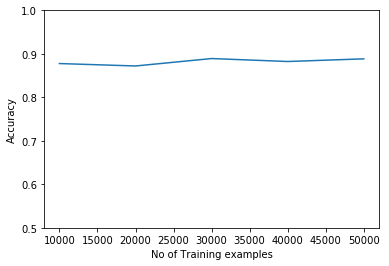

In [14]:
x_axis = [i * 10000 for i in range(1,6)]
plt.plot(x_axis, accuracy_vs_training_ex)
plt.xlabel("No of Training examples")
plt.ylabel("Accuracy")
plt.ylim((0.5,1))
plt.show()

The number of training examples has a very little effect on the test set accuracy. 

**Part B**: Explore the relationship between the number of nearest neighbors and accuracy on the test set. Comment on your findings and support your observations with some kind of plot.

In [15]:
accuracy_vs_k = []
for i in range(1,11):
    MNIST_Knn = Knearest(data.train_x, data.train_y, i, 1000)
    accuracy_vs_k.append(MNIST_Knn.accuracy(MNIST_Knn.confusion_matrix(data.test_x, data.test_y)))

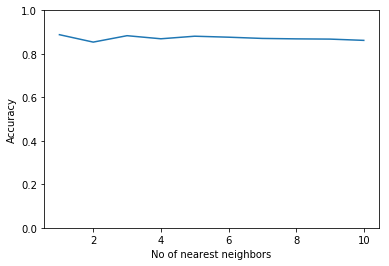

In [63]:
x_axis = [i for i in range(1, 11)]
plt.plot(x_axis, accuracy_vs_k)
plt.xlabel("No of nearest neighbors")
plt.ylabel("Accuracy")
plt.ylim((0,1))
plt.show()

The accuracy is the highest when k = 1. It then keeps decreasing and increasing, and stays more or less flat as k keeps increasing.

**Part C**: Which numbers get confused with each other the most easily?  Use the confusion_matrix function that you wrote above to support your conclusion.  Then use the `view_digit` function given below to plot a few examples of misclassified digits and discuss possible reasons for the misclassifications.  (Investigating misclassified examples is called **error analysis** and is an important step in the development of any classification technique).  

In [17]:
MNIST_Knn = Knearest(data.train_x, data.train_y, 3, 1000)
print(MNIST_Knn.confusion_matrix(data.test_x, data.test_y))

[[ 931    0    7    7    0    9   24    3    2    8]
 [   0 1056    2    1    0    0    0    3    0    2]
 [  13   52  822   17    6    1    6   41   13   19]
 [   2    7    4  942    1   26    5   10   24    9]
 [   0   38    1    0  764    2    7   30    1  140]
 [   4   16    2   83    3  754   27    7    3   16]
 [   4   10    2    1    5    2  940    1    0    2]
 [   1   33    0    0    2    0    0 1018    0   36]
 [   4   61    6   67    2   29   11   26  767   36]
 [   3    9    1   16   21    3    0   79    1  828]]


(9, 7), (5,3) are the numbers which get confused with each other the most easily.

Predicted label: 7
true label: 9


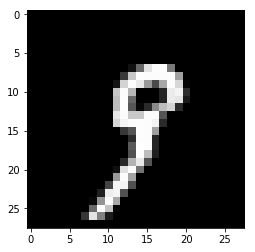

In [26]:
def view_digit(example, label=None):
    if label: print("true label: {:d}".format(label))
    plt.imshow(example.reshape(28,28), cmap='gray');

for i in range(0, len(data.train_x)):
    if MNIST_Knn.classify(data.train_x[i]) == 7 and data.train_y[i] == 9:
        print('Predicted label:', MNIST_Knn.classify(data.train_x[i]))
        view_digit(data.train_x[i], data.train_y[i])
        break

Predicted label: 3
true label: 5


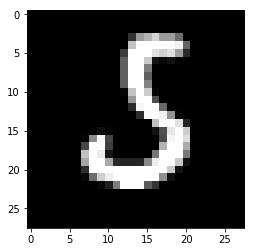

In [27]:
for i in range(0, len(data.train_x)):
    if MNIST_Knn.classify(data.train_x[i]) == 3 and data.train_y[i] == 5:
        print('Predicted label:', MNIST_Knn.classify(data.train_x[i]))
        view_digit(data.train_x[i], data.train_y[i])
        break

For the case of (9,7), if the loop in 9 is distorted, it looks more like 7.
For the case of (5,3), the bottom half of 5 has a lot of similarity with the bottom half of 3. The top could also look similar if the images are distorted.

**Part D**: Now using the entire training dataset and best value of `k` found from previous analysis, plot test accuracy vs number of prototypes for reasonable values of p (more than 1000). What are the trade-offs you are making when using prototypes instead of all the training examples?

In [28]:
accuracy_vs_p = []
for i in range(2,11,2):
    MNIST_Knn = Knearest(data.train_x, data.train_y, 3, i*1000)
    accuracy_vs_p.append(MNIST_Knn.accuracy(MNIST_Knn.confusion_matrix(data.test_x, data.test_y)))

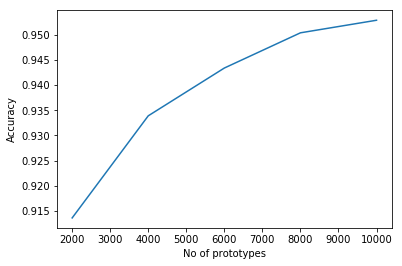

In [29]:
x_axis = [i*1000 for i in range(2, 11, 2)]
plt.plot(x_axis, accuracy_vs_p)
plt.xlabel("No of prototypes")
plt.ylabel("Accuracy")
plt.show()

The test accuracy increases with the number of prototypes as shown in the figure.
When using prototypes instead of all the training examples, we are sacrificing a little bit of accuracy for a much faster running time.

### Perceptron - 10 points
***
Consider the IRIS dataset discussed in lecture. We have created a binary classification problem to determine whether a given flower is a setosa or not. To create this, we pre-processed the labels to create a label vector where setosa’s label is unchanged (i.e. its label is 1), but both versicolor and virginica are now labeled as -1. The data contains two out of the four attributes, petal width and petal length. This training data and the modified labels can be loaded using `IrisM` class. We are going to use this dataset for training a Perceptron classifier in subsequent problems. 
<br>

![Samples of Iris Flowers](wide_iris.png "Iris Dataset")


<br>

In [31]:
class IrisM:
    """
    Class to store modified iris data for Perceptron Training
    """
    
    def __init__(self):
        from sklearn import datasets
        
        iris = datasets.load_iris()
        
        # only taking first two features
        X = iris.data[:, :2]
        y = iris.target[:]
        
        # only considering whether it is setosa or not
        y[iris.target != 0] = -1
        y[iris.target == 0] = 1
        
        mask = np.random.choice(a = [False, True], size = 150, p = (0.66, 1 - 0.66))
        
        self.train_x, self.train_y = X[mask], y[mask]
        self.test_x, self.test_y = X[~mask], y[~mask]
        
        

In [57]:
iris = IrisM()

The class below implements Perceptron classifier in Python on modified IRIS data. The `Peceptron` class implements a Perceptron classifier on a training set of n examples, each of which is  d dimensional vector. The labels for the examples are -1 or 1. This is a simple preceptron classifier seen in class where the linear separator passes through the origin i.e has offset parameter = 0. Your tasks are as following:
1. Implement `train` function which trains a Perceptron classifier on a training set. The function should return $\theta$, the final classification vector and the number of updates performed
1. Implement `predict` function which takes an example as input and returns the predicted label
1. Implement `margin` function which returns geometric margin of the classifier

In [58]:
class Perceptron:
    """
    Perceptron Classifier
    """
    
    def __init__(self, X, y):
        """
        Creates a perceptron instance

        :param X: Training data input
        :param y: Training data output
        """
        self._X = X
        self._y = y
        self._theta, self._iter = self.train(X, y)
        
    def train(self, X, y):
        """
        Train perceptron and return final classification vector and
        the number of updates performed respectively
        
        :param X: Training data input
        :param y: Training data output
        """
        theta = np.zeros(np.shape(X)[1])
        count = 0
        y_pred = [1 if np.dot(theta, x)>0 else -1 for x in X]
        
        # Loop through, till all the examples are classified correctly
        epoch = 1
        while epoch <= 1000 and not(y == y_pred).all():
            epoch += 1
            for i in range(0, len(X)):
                y_pred[i] = 1 if np.dot(theta, X[i]) > 0 else -1
                if y_pred[i] != y[i]:
                    theta = theta + y[i]*X[i]
                    count += 1
                    
        print('Theta:', theta)
        print('No of updates performed:', count)
        return theta, count
        
    def predict(self, X):
        """
        Predicts the label for input
        
        :param X: Testing data input
        """
        return 1 if np.dot(self._theta, X) > 0 else -1
        
    def margin(self):
        """
        Returns geometric margin of the classifier
        """
        # Loop through all the data points to find the margin
        _margin = float('Inf')
        for i in range(0, len(self._X)):
            _margin_temp = np.dot(self._theta, self._X[i])/np.linalg.norm(self._theta)
            _margin = min(abs(_margin_temp), _margin)
        return _margin
    

In [59]:
import unittest

class TestPerceptron(unittest.TestCase):
    def setUp(self):
        self.x = np.array([[1, 2], [4, 5], [2, 1], [5, 4]])
        self.y = np.array([+1, +1, -1, -1])
        self.perceptron = Perceptron(self.x, self.y)
        self.queries = np.array([[1, 5], [0, 3], [6, 4], [2, 2]])

    def test0(self):
        """
        Test Perceptron
        """
        self.assertEqual(self.perceptron.predict(self.queries[0]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[1]),  1)
        self.assertEqual(self.perceptron.predict(self.queries[2]), -1)
        self.assertEqual(self.perceptron.predict(self.queries[3]), -1)
        
tests = TestPerceptron()
tests_to_run = unittest.TestLoader().loadTestsFromModule(tests)
unittest.TextTestRunner().run(tests_to_run)

.

Theta: [-1.  1.]
No of updates performed: 2



----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

Now, we are going to using `IrisM` dataset to train a perceptron using `Perceptron` class.

**Part A:** From class we know that this data is linearly separable but the separator does not pass through the origin. Therefore you will need to follow the technique used in lecture to further pre-process the data to be linearly separable through the origin: for each data point, add an additional feature, set to a constant value (please use the value 1 for consistency). Then, use the `Perceptron` class to train a Perceptron classifier.

In [60]:
iris_perceptron = Perceptron(np.insert(iris.train_x, 0, 1, axis=1), iris.train_y)

Theta: [  5.  -12.4  18.9]
No of updates performed: 45


**Part B:** What is the angle between Perceptron's classification vector and vector $(1, 0)^T$? Report number of iterations to converge and the accuracy on test set.

In [61]:
import math
vec = np.array([1, 1, 0])
cos_angle = (np.dot(iris_perceptron._theta, vec))/(np.linalg.norm(iris_perceptron._theta)* np.linalg.norm(vec))
angle = math.degrees(math.acos(cos_angle))

correct_classifications = 0
for i in range(0, len(iris.test_x)):
    if iris_perceptron.predict(np.insert(iris.test_x[i], 0, 1)) == iris.test_y[i]:
        correct_classifications += 1
        
print("The angle between Perceptron's classification vector and vector (1,0)^T is", angle)
print("The number of iterations to converge:", iris_perceptron._iter)
print("The accuracy on the test set is", correct_classifications/len(iris.test_x))

The angle between Perceptron's classification vector and vector (1,0)^T is 103.06285315204292
The number of iterations to converge: 45
The accuracy on the test set is 0.9803921568627451


**Part C:** Compute the geometric margins of your classifier with respect to the `IrisM` dataset used. Recall that the distance of a point from $x_t$ from the line $\theta^T x = 0$ is $\frac{\theta^Tx_t}{||x||}$

In [64]:
print('The geometric margin of the classifier with respect to the IrisM dataset is', iris_perceptron.margin())

The geometric margin of the classifier with respect to the IrisM dataset is 0.09416429362
